In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
marrtrain = pd.read_csv("C:/Users/Shiva/Desktop/Kumaresaan/Predictive Analytics/Marriage_predictions/Marriage_training.csv")

In [3]:
marrtrain.head(5)

,ID,GAGE,BAGE,GP,BP,AINCOME,STATUS
0,1,41,41,A,B,113764,Married
1,2,53,43,A,A,145963,Separated
2,3,47,37,A,B,42857,Divorced
3,4,47,44,B,A,95352,Married
4,5,21,59,B,B,182138,Separated


In [4]:
marrtest = pd.read_csv("C:/Users/Shiva/Desktop/Kumaresaan/Predictive Analytics/Marriage_predictions/Marriage_testing_data.csv")

In [5]:
marrtest.head(5)

,ID,GAGE,BAGE,GP,BP,AINCOME,STATUS
0,20001,38,28,B,B,181126,NaN
1,20002,23,23,A,B,99510,NaN
2,20003,28,27,A,A,159644,NaN
3,20004,25,56,B,A,65539,NaN
4,20005,28,28,B,A,178125,NaN


## Encoding Strings to classes for easy evaluation

In [6]:
from sklearn.preprocessing import LabelEncoder
Lab = LabelEncoder()

In [7]:
marrtrain['GP']= Lab.fit_transform(marrtrain['GP'])
marrtest['GP']= Lab.fit_transform(marrtest['GP'])

In [8]:
marrtrain.head(10)

,ID,GAGE,BAGE,GP,BP,AINCOME,STATUS
0,1,41,41,0,B,113764,Married
1,2,53,43,0,A,145963,Separated
2,3,47,37,0,B,42857,Divorced
3,4,47,44,1,A,95352,Married
4,5,21,59,1,B,182138,Separated
5,6,37,32,1,A,76006,Married
6,7,38,31,0,B,22874,Married
7,8,31,26,1,A,100729,Married
8,9,62,36,1,A,23875,Divorced
9,10,56,55,1,A,182209,Married


In [9]:
marrtrain['BP']= Lab.fit_transform(marrtrain['BP'])
marrtest['BP']= Lab.fit_transform(marrtest['BP'])

In [10]:
marrtrain['STATUS']= Lab.fit_transform(marrtrain['STATUS'])

In [11]:
marrtrain.head(10)

,ID,GAGE,BAGE,GP,BP,AINCOME,STATUS
0,1,41,41,0,1,113764,1
1,2,53,43,0,0,145963,2
2,3,47,37,0,1,42857,0
3,4,47,44,1,0,95352,1
4,5,21,59,1,1,182138,2
5,6,37,32,1,0,76006,1
6,7,38,31,0,1,22874,1
7,8,31,26,1,0,100729,1
8,9,62,36,1,0,23875,0
9,10,56,55,1,0,182209,1


## Selecting features and target

In [12]:
features = [x for x in marrtrain.columns if x not in ('ID','STATUS')]
target = marrtrain['STATUS']

In [13]:
features

['GAGE', 'BAGE', 'GP', 'BP', 'AINCOME']

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
Lg = LogisticRegression()

In [16]:
Lg.fit(marrtrain[features],target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
Lg.predict(marrtest[features])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [18]:
predLg = Lg.predict(marrtrain[features])

## Testing acccuracy by predicting on training set itself

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
accuracy_score(target, predLg)

0.5133333333333333

## K Neighbors Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()

In [22]:
Knn.fit(marrtrain[features],target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
Knn.predict(marrtest[features])

array([2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1,
       1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2],
      dtype=int64)

In [24]:
predKnn = Knn.predict(marrtrain[features])

In [25]:
accuracy_score(target, predKnn)

0.5853333333333334

## Train Test Split

In [26]:
from sklearn.cross_validation import train_test_split

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(marrtrain[features],target,random_state=1)

## Logistic Regression again

In [28]:
Lg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
predLg1 = Lg.predict(xtest)

In [30]:
accuracy_score(ytest,predLg1)

0.5319148936170213

## KNN algorithm again

In [31]:
Knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
predknn1 = Knn.predict(xtest)

In [33]:
accuracy_score(ytest, predknn1)

0.3404255319148936

## Next Step - Cross validation

In [34]:
from sklearn.cross_validation import cross_val_score

In [35]:
scoresknn = cross_val_score(Knn,marrtrain[features],target,cv=10,scoring='accuracy')

In [36]:
scoresknn.mean()

0.3705192034139403

In [37]:
scoreslg = cross_val_score(Lg, marrtrain[features], target, cv=10, scoring='accuracy')

In [38]:
scoreslg.mean()

0.5133357041251777

## To increase accuracy, find the important features using SelectKBest

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [40]:
selector_c = SelectKBest(f_classif, k=4)
selector_c.fit(marrtrain[features],target)

SelectKBest(k=4, score_func=<function f_classif at 0x0000002100B67950>)

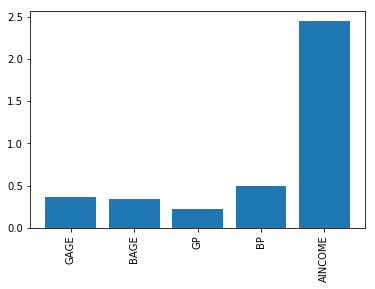

In [41]:
scores_c = -np.log10(selector_c.pvalues_)
plt.bar(range(len(features)), scores_c)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()

In [42]:
featureset1 = [x for x in marrtrain.columns if x in ['AINCOME']]

In [43]:
featureset1

['AINCOME']

In [44]:
Lg1 = LogisticRegression()

In [45]:
Lg1.fit(marrtrain[featureset1], target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
scoreslg1 = cross_val_score(Lg1,marrtrain[featureset1],target,cv=10,scoring='accuracy')

In [47]:
scoreslg1.mean()

0.5133357041251777

## Try new algorithms for increase in accuracy

### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
Dt = DecisionTreeClassifier()

In [50]:
Dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
predDt = Dt.predict(xtest)

In [52]:
accuracy_score(ytest, predDt)

0.7074468085106383

In [53]:
predDt

array([0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1,
       2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1,
       2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0], dtype=int64)

In [54]:
scoresDt = cross_val_score(Dt,marrtrain[features],target,cv=10,scoring='accuracy')

In [55]:
scoresDt.mean()

0.6351706970128024

## Random Forest - Bagging

In [56]:
from sklearn.ensemble import RandomForestClassifier

c:\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [57]:
Rf= RandomForestClassifier()

In [58]:
Rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
predRf = Rf.predict(xtest)

In [60]:
accuracy_score(ytest, predRf)

0.9148936170212766

In [61]:
predRf

array([0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 0], dtype=int64)

In [62]:
len(predRf)

188

In [63]:
confusion_matrix(ytest, predRf)

array([[23, 12,  0],
       [ 3, 50,  0],
       [ 0,  1, 99]], dtype=int64)

In [64]:
scoresRf = cross_val_score(Rf,marrtrain[features],target,cv=10,scoring='accuracy')

In [65]:
scoresRf.mean()

0.897475106685633

In [66]:
scoresRf

array([0.92105263, 0.85526316, 0.88157895, 0.88157895, 0.89473684,
       0.87837838, 0.87837838, 0.94594595, 0.91891892, 0.91891892])

## Looks like Random Forest has maximum accuracy

In [67]:
predRf1 = Rf.predict(marrtest[features])

In [68]:
predRf1

array([2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2],
      dtype=int64)

In [69]:
marrtestcopy = marrtest

In [70]:
marrtestcopy['MarriageStatus']= predRf1

In [71]:
marrtestcopy.head()

,ID,GAGE,BAGE,GP,BP,AINCOME,STATUS,MarriageStatus
0,20001,38,28,1,1,181126,NaN,2
1,20002,23,23,0,1,99510,NaN,1
2,20003,28,27,0,0,159644,NaN,2
3,20004,25,56,1,0,65539,NaN,0
4,20005,28,28,1,0,178125,NaN,2


In [72]:
marrtestcopy['STATUS']= marrtestcopy.MarriageStatus.map({0:"Divorced",1:"Married", 2:"Separated"})

In [73]:
marrtestcopy.head(10)

,ID,GAGE,BAGE,GP,BP,AINCOME,STATUS,MarriageStatus
0,20001,38,28,1,1,181126,Separated,2
1,20002,23,23,0,1,99510,Married,1
2,20003,28,27,0,0,159644,Separated,2
3,20004,25,56,1,0,65539,Divorced,0
4,20005,28,28,1,0,178125,Separated,2
5,20006,58,52,1,0,149855,Married,1
6,20007,30,25,1,0,38432,Married,1
7,20008,43,33,0,1,78532,Married,1
8,20009,61,37,1,0,24456,Married,1
9,20010,48,36,0,1,164069,Separated,2


# Boost the accuracy without overfitting using Gradient Boosting Algorithm

## XGB Classifier

In [74]:
from xgboost import XGBClassifier

In [75]:
XG = XGBClassifier()

In [76]:
XG.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [77]:
predXG = XG.predict(xtest)

c:\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [78]:
accuracy_score(ytest,predXG)

0.75

## Looks like Boosting algorithm doesn't seem to neither increase the accuracy or build a perfect model. So Random Forest Bagging Algorithm is best suited for this problem